In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import statsmodels as sms
mpl.rc('figure', max_open_warning = 0)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data_stage.csv')
#data=data.set_index('Date',drop=True)
data.Date[0]

'2022-04-29 15:00:00'

In [ ]:
data=data.sort_values(by=['Code_ATM','Date'])
for i in range(len(data)):
  data.Date[i] = datetime.datetime.strptime(data.Date[i],"%Y-%m-%d %H:%M:%S")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data=data.reset_index(drop=True)
#adding a column with only the day to make a groupby day
codes=data['Code_ATM'].unique()
l=[]
for i in range(len(codes)):
  l.append((data[data['Code_ATM']==codes[i]].drop(columns=['Code_ATM']),codes[i]))
l1=[]
for i in range(len(l)):
  l1.append((l[i][0].reset_index(drop=True),codes[i]))
  for j in range(len(l1[i][0])):
    l1[i][0]['Date'][j]=l1[i][0]['Date'][j].date()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
d=[]
for k in range(len(l1)):
  d.append(l1[k][0].groupby(by=['Date']).sum())
  for i in range(len(d[k])):
    if d[k].working[i]>0:
      d[k].working[i]=1
    if d[k].religious[i]>0:
      d[k].religious[i]=1
    if d[k].school[i]>0:
      d[k].school[i]=1


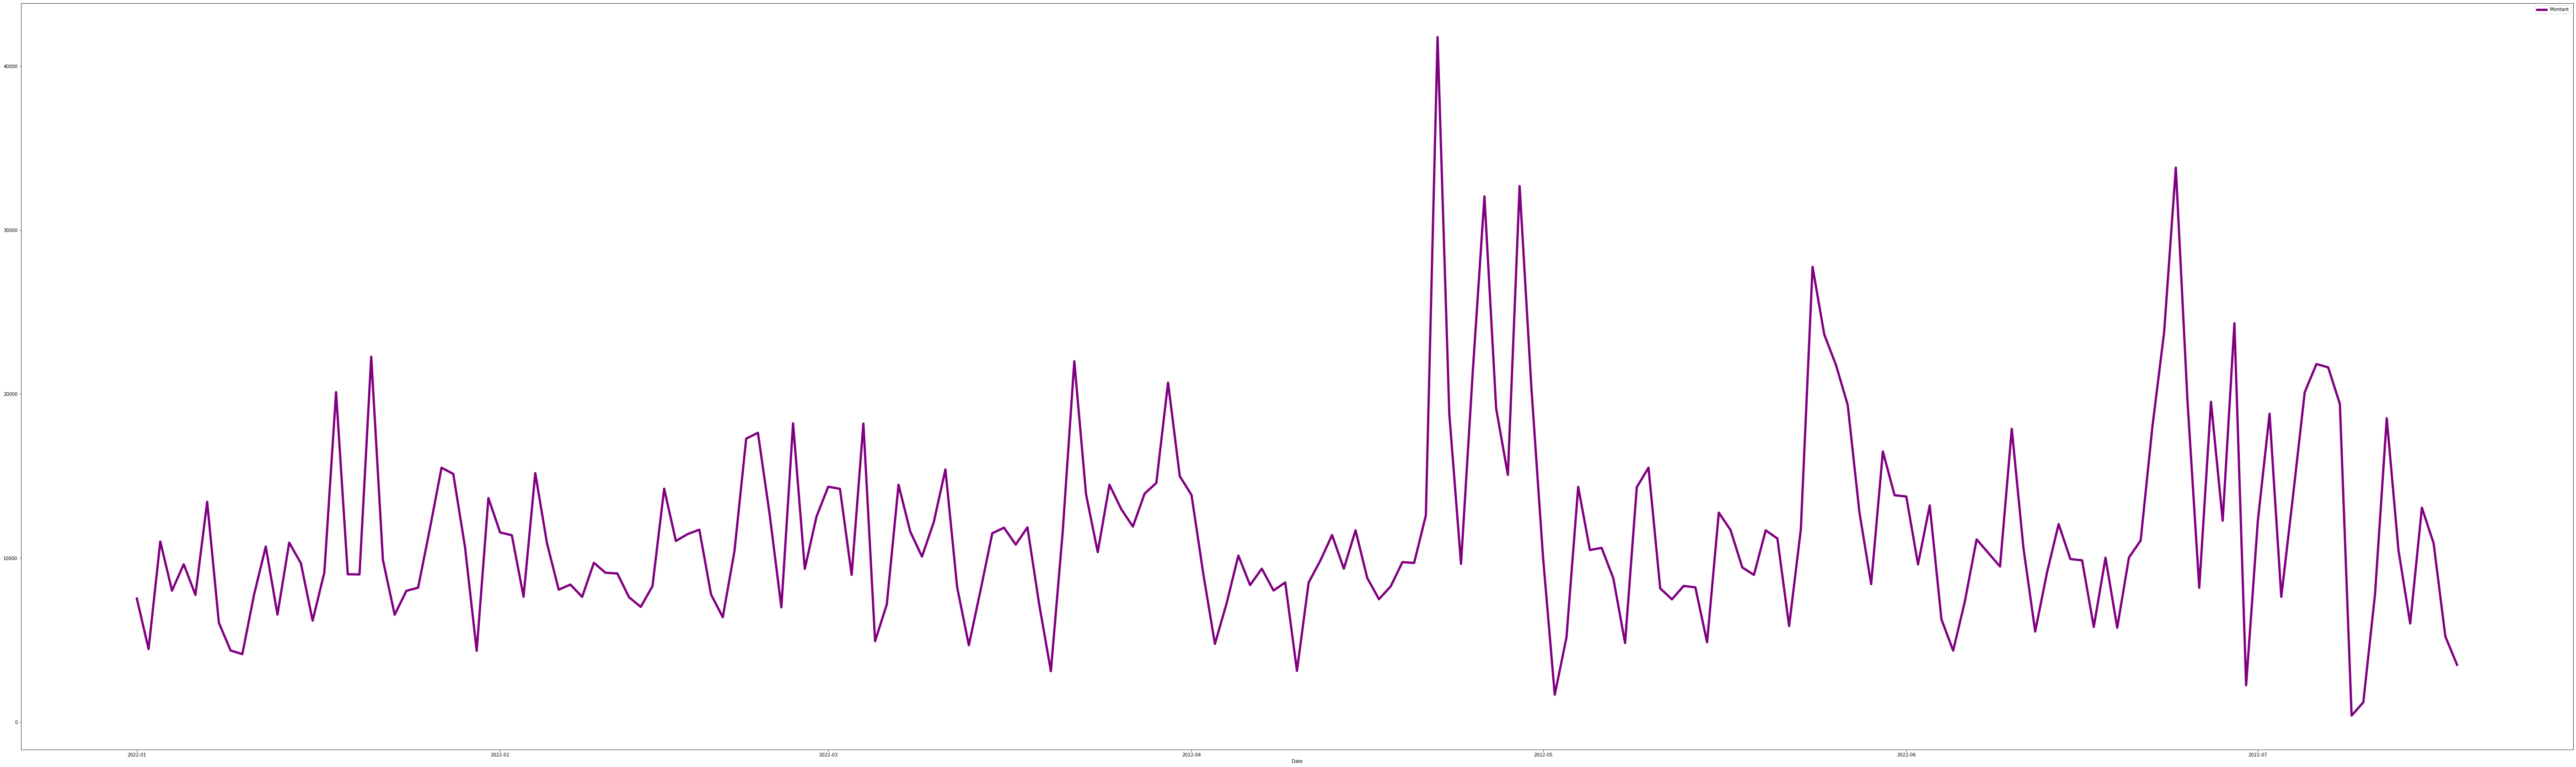

In [ ]:
d[0].plot(y='Montant',figsize=(100,30),color='purple', linewidth=5)

In [ ]:
d[0]=d[0].reset_index()

In [ ]:
d[0]['Date']=pd.to_datetime(d[0]['Date'])

In [ ]:
d[0].set_index('Date',inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
d[0]['Montant']=d[0]['Montant'].astype('float32')

In [ ]:
### split train and test data
from datetime import datetime,timedelta
train_dataset_end=datetime(2022,6,10)
test_dataset_end=datetime(2022,7,18)

In [ ]:
train_data=d[0][:train_dataset_end]
test_data=d[0][train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

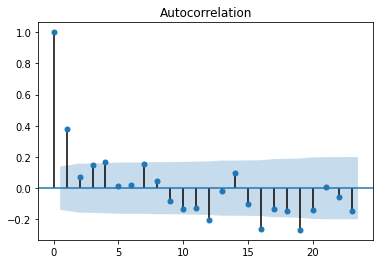

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(d[0]["Montant"].dropna())

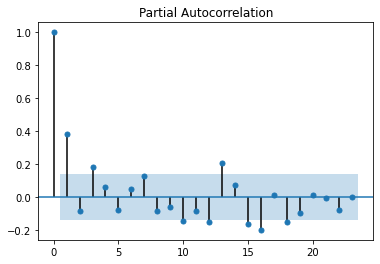

In [ ]:
pacf = plot_pacf(d[0]["Montant"].dropna())

In [ ]:
adfuller(d[0]['Montant'])[1]

9.328654300259344e-05

In [ ]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
type(train_data)

pandas.core.frame.DataFrame

In [ ]:
model_ARIMA=ARIMA(train_data['Montant'],order=(3,0,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

In [ ]:
model_Arima_fit=model_ARIMA.fit()

In [ ]:
model_Arima_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Montant   No. Observations:                  161
Model:                     ARMA(3, 2)   Log Likelihood               -1589.868
Method:                       css-mle   S.D. of innovations           4611.934
Date:                Sat, 10 Sep 2022   AIC                           3193.736
Time:                        16:37:58   BIC                           3215.306
Sample:                    01-01-2022   HQIC                          3202.494
                         - 06-10-2022                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.14e+04    676.547     16.847      0.000    1.01e+04    1.27e+04
ar.L1.Montant     0.0199        nan        nan        nan         nan         nan
ar.L2.Montant    -0.7937      0.001   -534.718      0.000      -0.797      -0.791
ar.L3.Montant     0.4641      0.002    252.093      0.000       0.460       0.468
ma.L1.Montant     0.4512      0.016     28.729      0.000       0.420       0.482
ma.L2.Montant     1.0000      0.046     21.713      0.000       0.910       1.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2221           -0.9751j            1.0001           -0.2856
AR.2           -0.2221           +0.9751j            1.0001            0.2856
AR.3            2.1546           -0.0000j            2.1546           -0.0000
MA.1           -0.2256           -0.9742j            1.0000           -0.2862
MA.2           -0.2256           +0.9742j            1.0000            0.2862
-----------------------------------------------------------------------------
"""

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-06-11 00:00:00
2022-07-18 00:00:00


In [ ]:

pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Montant']-pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
pred

2022-06-11    14369.204964
2022-06-12     9723.968064
2022-06-13    12014.624677
2022-06-14    14117.973165
2022-06-15    10185.938841
2022-06-16     9501.216238
2022-06-17    13584.654129
2022-06-18    12384.661415
2022-06-19     8801.879339
2022-06-20    11578.047419
2022-06-21    13920.171292
2022-06-22    10100.596460
2022-06-23     9453.908978
2022-06-24    13559.653980
2022-06-25    12382.106567
2022-06-26     8799.717202
2022-06-27    11568.430082
2022-06-28    13920.510259
2022-06-29    10107.233302
2022-06-30     9449.308858
2022-07-01    13554.451871
2022-07-02    12388.734238
2022-07-03     8801.843380
2022-07-04    11560.797680
2022-07-05    13921.746461
2022-07-06    10114.302655
2022-07-07     9444.926367
2022-07-08    13549.327193
2022-07-09    12395.391434
2022-07-10     8804.009685
2022-07-11    11553.178576
2022-07-12    13922.964780
2022-07-13    10121.379717
2022-07-14     9440.564396
2022-07-15    13544.188505
2022-07-16    12402.035642
2022-07-17     8806.196375
2

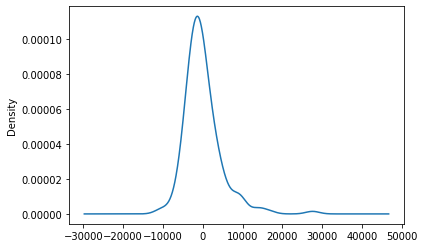

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


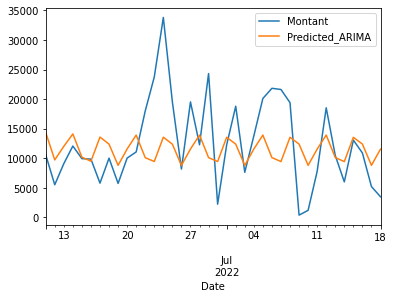

In [ ]:
test_data[['Montant','Predicted_ARIMA']].plot()

In [ ]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMA=SARIMAX(train_data['Montant'],order=(3,0,2),seasonal_order=(4,0,2,7))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           Montant   No. Observations:                  161
Model:             SARIMAX(3, 0, 2)x(4, 0, 2, 7)   Log Likelihood               -1588.588
Date:                           Sat, 10 Sep 2022   AIC                           3201.177
Time:                                   16:38:05   BIC                           3238.153
Sample:                               01-01-2022   HQIC                          3216.191
                                    - 06-10-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0904      0.499      2.184      0.029       0.112       2.069
ar.L2         -0.4800      0.571     -0.841      0.401      -1.599       0.639
ar.L3          0.2992      0.200      1.500      0.134      -0.092       0.690
ma.L1         -0.6124      0.544     -1.126      0.260      -1.679       0.454
ma.L2          0.0983      0.458      0.215      0.830      -0.799       0.995
ar.S.L7        0.6652      0.739      0.900      0.368      -0.783       2.113
ar.S.L14       0.2076      0.699      0.297      0.766      -1.162       1.578
ar.S.L21      -0.1153      0.227     -0.509      0.611      -0.559       0.329
ar.S.L28       0.2350      0.178      1.323      0.186      -0.113       0.583
ma.S.L7       -0.6732      0.749     -0.898      0.369      -2.142       0.795
ma.S.L14      -0.2223      0.714     -0.311      0.755      -1.621       1.177
sigma2      2.779e+07   5.48e-08   5.07e+14      0.000    2.78e+07    2.78e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               751.71
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                             1.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.36e+31. Standard errors may be unstable.
"""

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-06-11 00:00:00
2022-07-18 00:00:00


In [ ]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2022,5,18),end=datetime(2022,7,18))
residuals=test_data['Montant']-pred_Sarima

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


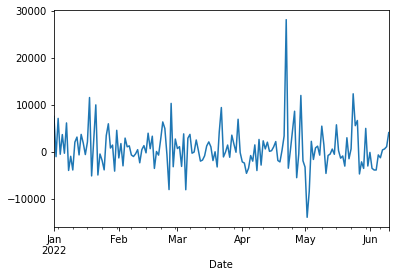

In [ ]:
model_SARIMA_fit.resid.plot()

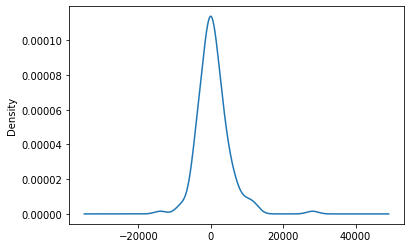

In [ ]:
model_SARIMA_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_SARIMA']=pred_Sarima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


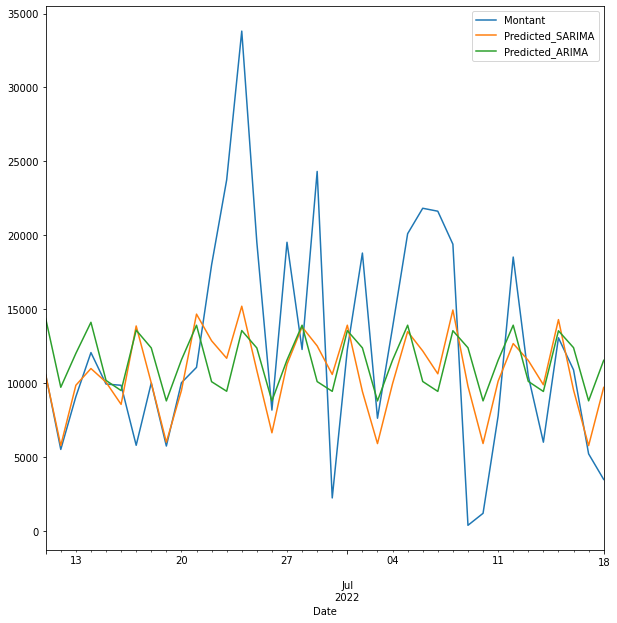

In [ ]:
test_data[['Montant','Predicted_SARIMA','Predicted_ARIMA']].plot(figsize=(10,10))

In [ ]:
from google.colab import files
df=pred_Sarima.to_frame()
df.to_csv('Sarima prediction.csv', encoding = 'utf-8-sig') 
files.download('Sarima prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pandas.core.series.Series